# Polynomial Regression

In this exercise you need to use polynomial regression to estimate the height reached by a ball thrown into air. The motion of the ball is controlled by the motion equation with uniform acceleration (in our case given by the gravity) that is a quadratic model. You need to estimate the initial height of the ball (h), the initial speed at which it was launched (v) and the gravity acceleration (g). The equation of the motion is : $y = h + vt + \frac{1}{2} gt^2$ .
In the height.csv file you can find the measured height values (subject to noise) while in time.csv file you can find the corresponding time instants.

In [1]:
#import the required packages
import matplotlib.pyplot as plt
import csv
from scipy import stats
import numpy as np
import sklearn as sl
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [2]:
# load the data from the time.csv (features) and height.csv (measured values) files
with open('data/time.csv', 'r') as f:
    reader = csv.reader(f, delimiter=',')
    # get all the rows as a list
    x = list(reader)
    # transform x into numpy array
    x = np.array(x).astype(float)
    
with open('data/height.csv', 'r') as f2:
    reader2 = csv.reader(f2, delimiter=',')
    # get all the rows as a list
    y = list(reader2)
    # transform data into numpy array
    y = np.array(y).astype(float)
    
print(x.shape)
print(y.shape)

(201, 1)
(201, 1)


In [3]:
# try to perform a linear interpolation (it does not work properly, why ?)
# you can use stats.linregress or linear_model.LinearRegression
slope, intercept, r_value, p_value, std_err = stats.linregress(x[:,0],y[:,0])

print('slope (linregress): ', slope,'  intercept (linregress):', intercept)
print('correlation coefficient:', r_value)

slope (linregress):  0.22423930932968666   intercept (linregress): 4.2153751087039835
correlation coefficient: 0.08764757852933583


In [4]:
# use polynomial regression (the feature vectors have three components:
# they contain all 1s (for bias), the input data $x$ and their squared values $x^2$
# for the regression you can use linear_model.LinearRegression
dataX = np.zeros([201,2])
dataX[:,0] = x[:,0]
dataX[:,1] = np.square(x[:,0])
#print(dataX)

reg = LinearRegression().fit(dataX,y)
reg.fit(dataX, y)

h = reg.intercept_
v = reg.coef_ [0, 0]
g = 2 * reg.coef_[0, 1]
sc = reg.score(dataX, y)

print('initial position: ', h,'  initial speed:', v, ' gravity acceleration:', g )
#reg.score produces the square of the correlation coefficient
print('correlation coefficient:', np.sqrt(sc))

initial position:  [0.96499498]   initial speed: 10.024380403461109  gravity acceleration: -9.800141094131419
correlation coefficient: 0.9977953125219581


# Question

Explain what do you conclude looking at the linear and polynomial fitting.

The equation of the motion is quadratic, so it's obvious that a linear model cannot fit well with the available data. The correlation coefficient is close to 0 in the linear model while it's pretty close to 1 in the polynomial one. The graph shows perfectly the result.

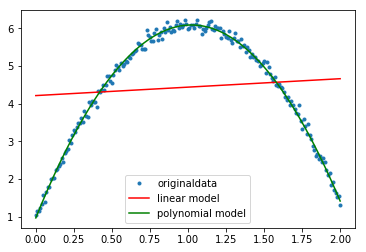

In [5]:
# plot the input data and the estimated models

#i got an error if computed directly in plot function, so i defined it before
x2 = np.square(x)

plt.plot(x, y, '.', label='originaldata')
plt.plot(x, intercept + slope*x, 'r', label='linear model')
plt.plot(x, h + v * x + 0.5 * g * x2 , 'g', label='polynomial model')
plt.legend()
plt.show()